In [4]:
import pandas as pd
df=pd.read_csv("Sample_Submission.csv")

In [14]:
df.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [15]:
df.shape

(367, 2)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df1=pd.read_csv("Training Dataset.csv")
df1.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
df1.shape

(614, 13)

In [22]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df1.LoanAmount=df1.LoanAmount.fillna(df1.LoanAmount.mean())

df1.Credit_History=df1.Credit_History.fillna(df1.Credit_History.mean())

df1.Loan_Amount_Term=df1.Loan_Amount_Term.fillna(df1.Loan_Amount_Term.mean())

df1['Gender'].fillna(df1['Gender'].value_counts().idxmax(), inplace=True)

df1['Married'].fillna(df1['Married'].value_counts().idxmax(), inplace=True)

df1.Dependents.fillna(df1.Dependents.value_counts().idxmax(), inplace=True)

df1.Self_Employed.fillna(df1.Self_Employed.value_counts().idxmax(), inplace=True)

In [27]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
df1.drop(['Loan_ID'],axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [35]:
df1[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].skew()

ApplicantIncome      1.017728
CoapplicantIncome    0.845204
LoanAmount           1.042174
Loan_Amount_Term    -2.059922
Credit_History      -1.963600
dtype: float64

In [37]:
df1.ApplicantIncome=df1.ApplicantIncome.clip(lower=df1.ApplicantIncome.quantile(0.05),upper=df1.ApplicantIncome.quantile(0.95))

df1.CoapplicantIncome=df1.CoapplicantIncome.clip(lower=df1.CoapplicantIncome.quantile(0.05),upper=df1.CoapplicantIncome.quantile(0.95))

df1.Loan_Amount_Term=df1.Loan_Amount_Term.clip(lower=df1.Loan_Amount_Term.quantile(0.14),upper=df1.Loan_Amount_Term.quantile(0.86))

df1.LoanAmount=df1.LoanAmount.clip(lower=df1.LoanAmount.quantile(0.05),upper=df1.LoanAmount.quantile(0.95))

df1.Credit_History=df1.Credit_History.clip(lower=df1.Credit_History.quantile(0.05),upper=df1.Credit_History.quantile(0.95))

df1.ApplicantIncome=df1.ApplicantIncome.clip(lower=df1.ApplicantIncome.quantile(0.10),upper=df1.ApplicantIncome.quantile(0.90))

In [38]:
df1[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].skew()

ApplicantIncome      1.008464
CoapplicantIncome    0.844906
LoanAmount           1.036572
Loan_Amount_Term    -2.059922
Credit_History      -1.963600
dtype: float64

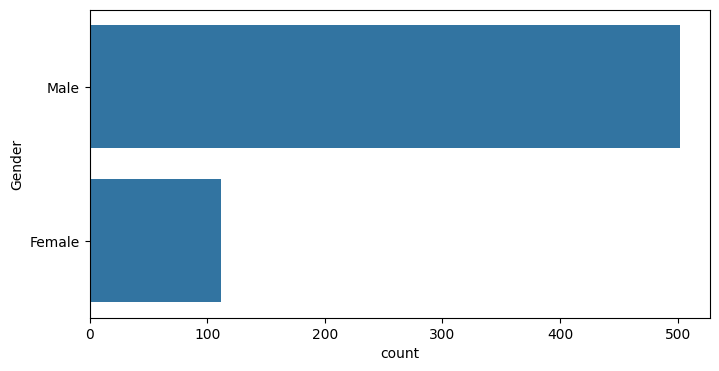

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(df1.Gender)
plt.show()

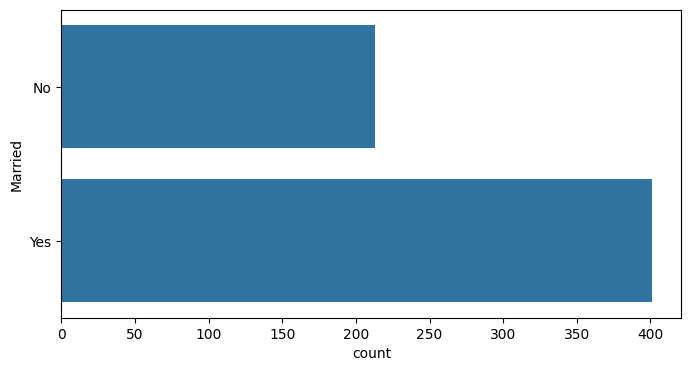

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(df1.Married)
plt.show()

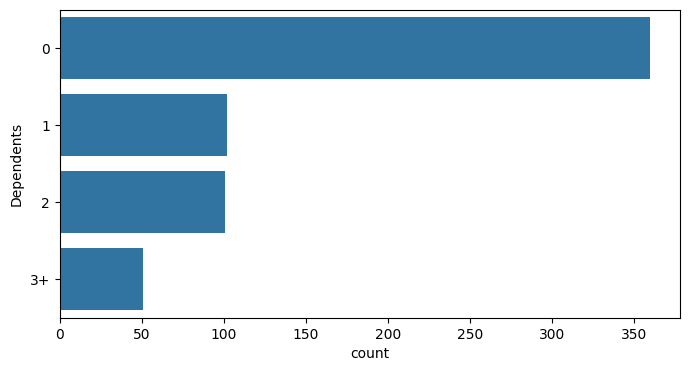

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(df1.Dependents)
plt.show()

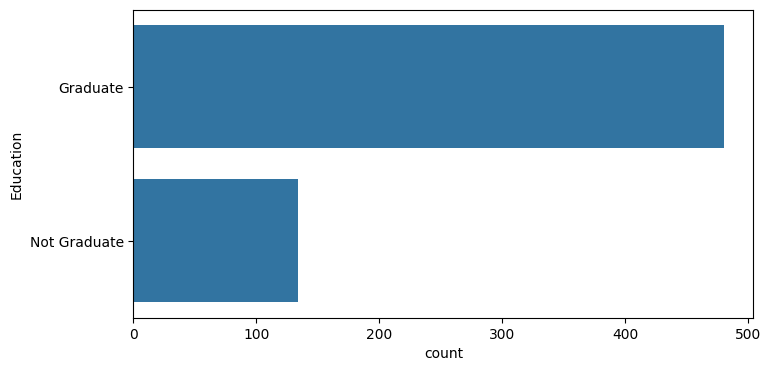

In [42]:
plt.figure(figsize=(8,4))
sns.countplot(df1.Education)
plt.show()

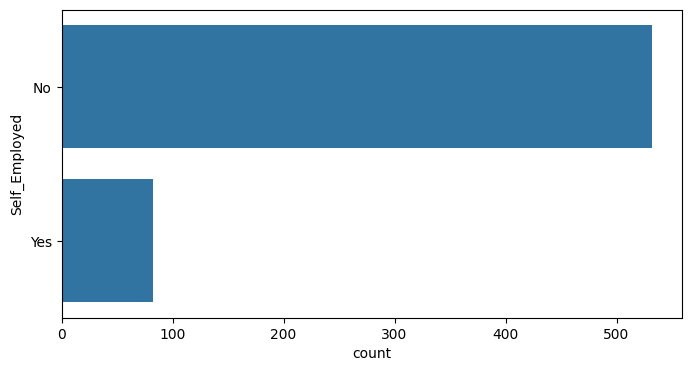

In [43]:
plt.figure(figsize=(8,4))
sns.countplot(df1.Self_Employed)
plt.show()

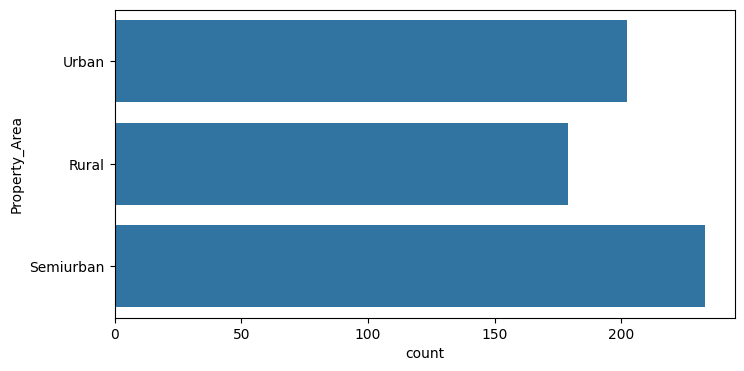

In [44]:
plt.figure(figsize=(8,4))
sns.countplot(df1.Property_Area)
plt.show()

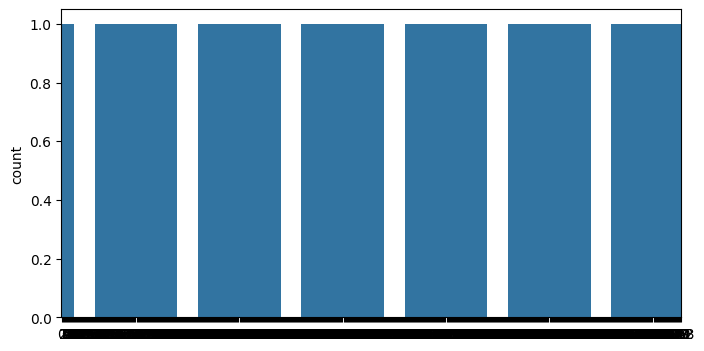

In [45]:
plt.figure(figsize=(8,4))
sns.countplot(df1.Credit_History)
plt.show()

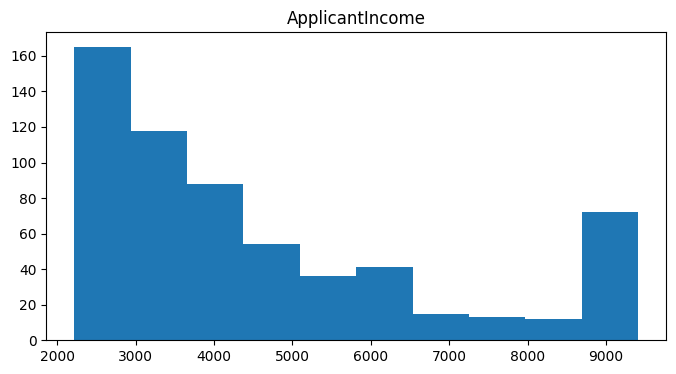

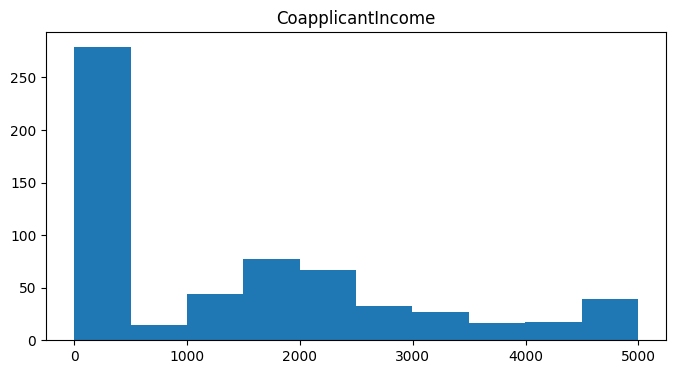

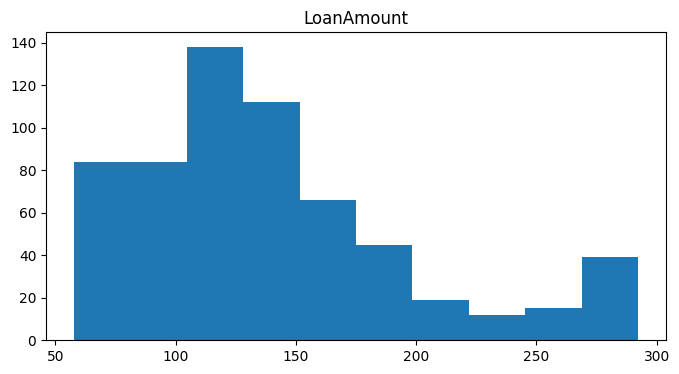

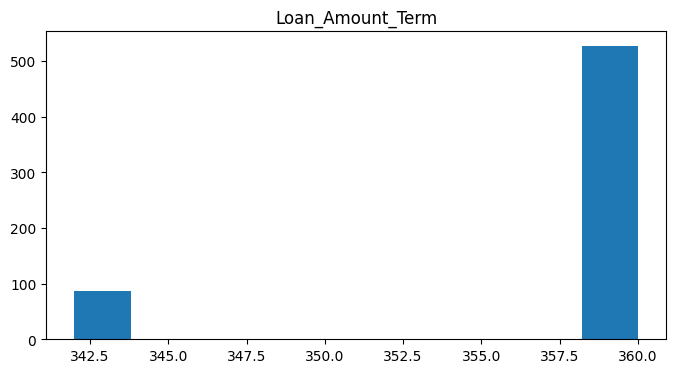

In [46]:
num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
for column in num:
    plt.figure(figsize=(8,4))
    plt.hist(df1[column])
    plt.title(column)
    plt.show()

In [47]:
df1.Loan_Status.replace('N',0,inplace=True)
df1.Loan_Status.replace('Y',1,inplace=True)


In [48]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,NaN,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,1
1,NaN,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,0
2,NaN,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,1
3,NaN,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,1
4,NaN,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,1


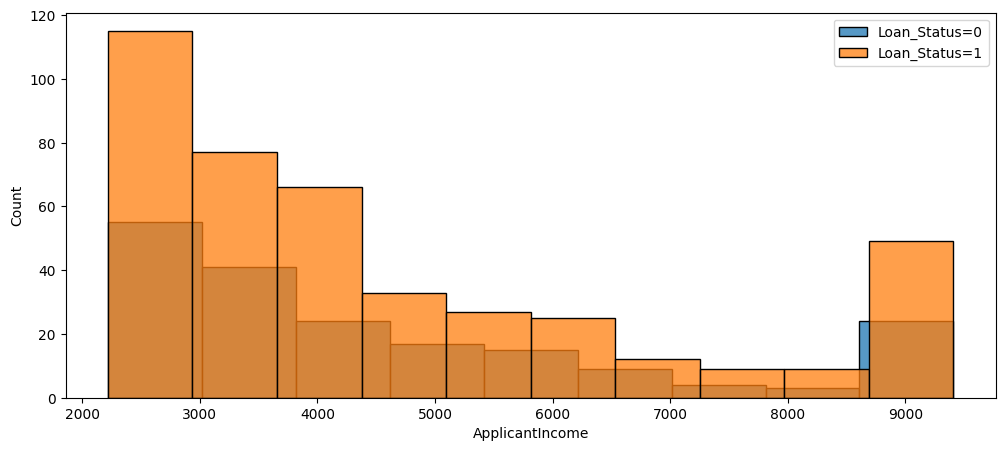

In [54]:
plt.figure(figsize=(12,5))
sns.histplot(df1['ApplicantIncome'][df1.Loan_Status==0])
sns.histplot(df1['ApplicantIncome'][df1.Loan_Status==1])
plt.legend(['Loan_Status=0','Loan_Status=1'])
plt.show()

In [55]:
from sklearn.preprocessing import LabelEncoder
df1['Education']=LabelEncoder().fit_transform(df1['Education'])
df1['Dependents']=LabelEncoder().fit_transform(df1['Dependents'])
df1['Self_Employed']=LabelEncoder().fit_transform(df1['Self_Employed'])
df1['Gender']=LabelEncoder().fit_transform(df1['Gender'])
df1['Married']=LabelEncoder().fit_transform(df1['Married'])
df1['Property_Area']=LabelEncoder().fit_transform(df1['Property_Area'])

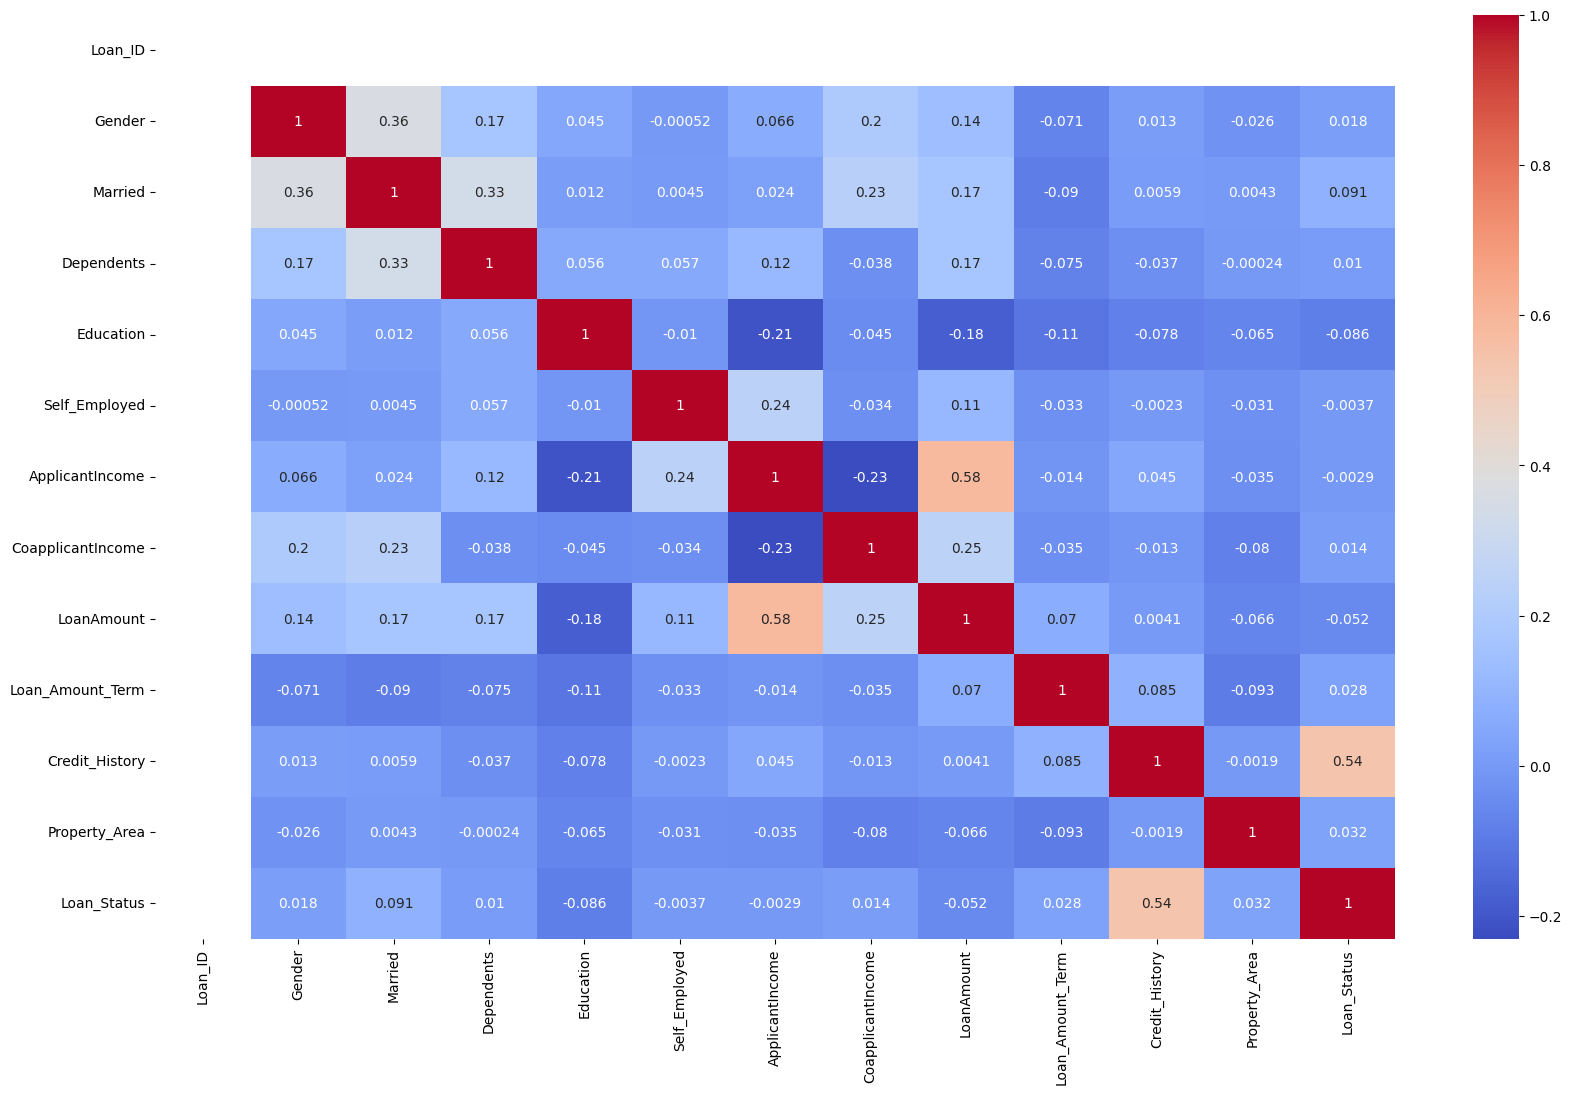

In [57]:
cor=df1.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()


In [58]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae,median_absolute_error as mee,classification_report as cr,accuracy_score as ac

In [59]:
df2=df1
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,NaN,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1
1,NaN,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,NaN,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,NaN,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,NaN,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1


In [60]:
col=['Loan_ID','Gender','Married','CoapplicantIncome','Loan_Amount_Term','Property_Area']
df2=df2.drop(columns=col,axis=1)
df2

,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,0,0,5849.0,146.412162,1.0,1
1,1,0,0,4583.0,128.000000,1.0,0
2,0,0,1,3000.0,66.000000,1.0,1
3,0,1,0,2583.0,120.000000,1.0,1
4,0,0,0,6000.0,141.000000,1.0,1
...,...,...,...,...,...,...,...
609,0,0,0,2900.0,71.000000,1.0,1
610,3,0,0,4106.0,57.914250,1.0,1
611,1,0,0,8072.0,253.000000,1.0,1
612,2,0,0,7583.0,187.000000,1.0,1


In [61]:
x=df2[['Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History']]
y=df2[['Loan_Status']]

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)


In [63]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pre1 = model.predict(x_test)

In [65]:
from sklearn.model_selection import cross_val_score
print(ac(y_test,y_pre1)*100)
sco1=(cross_val_score(model,x,y,cv=5))
print(np.mean(sco1)*100)

71.42857142857143
70.68505930960949


Text(0.5, 1.0, 'Output Confusion Matrix')

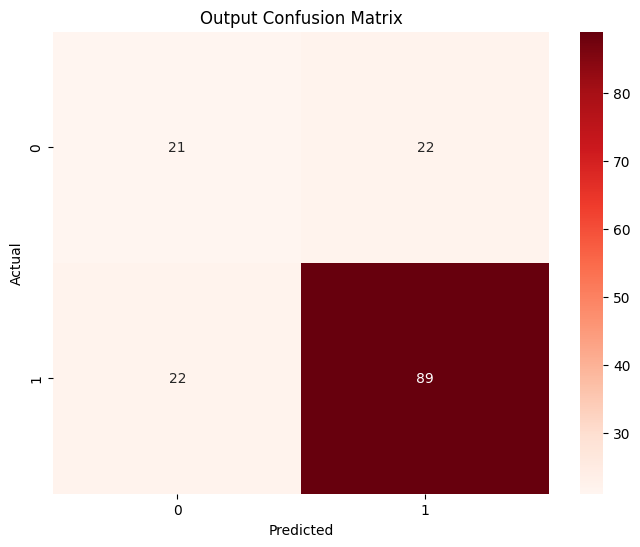

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pre1)
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix")

In [70]:
newinput=[[0,0,0,5849.0,146.412162,1.0]]
output1=model.predict(newinput)
output1

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [71]:
from sklearn.naive_bayes import GaussianNB  
classifier1 = GaussianNB()  
classifier1.fit(x_train, y_train)  

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [72]:
y_pred3= classifier1.predict(x_test) 

In [73]:
print(ac(y_test,y_pred3)*100)
sco3=(cross_val_score(classifier1,x,y,cv=5))
print(np.mean(sco3)*100)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

81.16883116883116
80.9462881514061


In [74]:
newinput1=[[0,0,0,5849.0,146.412162,1.0]]
output11=classifier1.predict(newinput1)
output11

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)